In [176]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math
import sys

In [177]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

# Классификация. https://www.kaggle.com/uciml/iris
# Метрика качества - F1

In [178]:
data = pd.read_csv('Iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [179]:
data.shape

(150, 6)

In [180]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [181]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [182]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


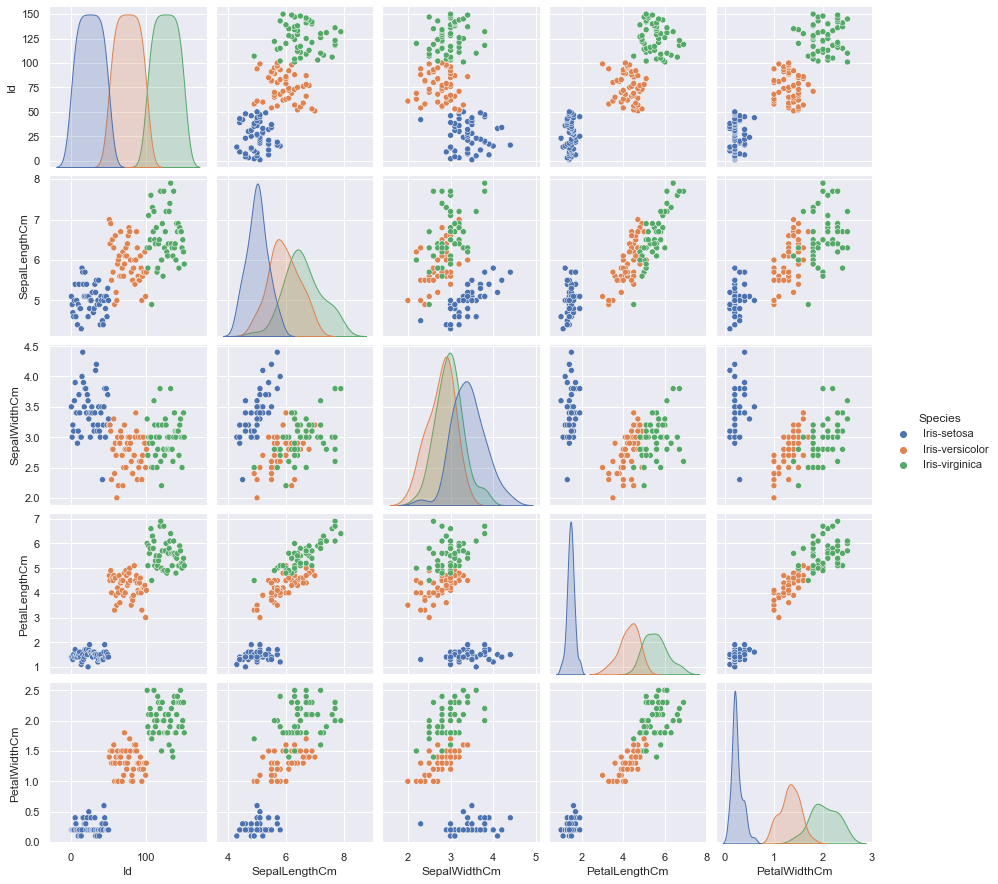

In [184]:
sns.pairplot(data, hue="Species")

In [185]:
d = pd.unique(data["Species"])

k = 1
for i in d:
    data.loc[(data["Species"] == i), 'Species'] = k
    k += 1
pd.unique(data["Species"])

array([1, 2, 3], dtype=object)

In [186]:
data["Species"] = pd.to_numeric(data["Species"])
pd.unique(data["Species"])

array([1, 2, 3])

In [187]:
categorical = list(data.dtypes[data.dtypes == "object"].index)
print(len(categorical))

0


In [188]:
cat = pd.get_dummies(data['Species'])
data.join(cat)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,1,2,3
0,1,5.1,3.5,1.4,0.2,1,1,0,0
1,2,4.9,3.0,1.4,0.2,1,1,0,0
2,3,4.7,3.2,1.3,0.2,1,1,0,0
3,4,4.6,3.1,1.5,0.2,1,1,0,0
4,5,5.0,3.6,1.4,0.2,1,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,0,0,1
146,147,6.3,2.5,5.0,1.9,3,0,0,1
147,148,6.5,3.0,5.2,2.0,3,0,0,1
148,149,6.2,3.4,5.4,2.3,3,0,0,1


In [190]:
y = data["Species"]
X = data.drop(columns=["Species"])

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [192]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества

In [203]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = 0
    tn = 0
    fn = 0
    fp = 0
    num_classes = len(set(y_act))
    for i in range(num_classes):
        tp += sum((y_act == i) & (y_pred == i))
        tn += sum((y_act != i) & (y_pred != i))
        fn += sum((y_act == i) & (y_pred != i))
        fp += sum((y_act != i) & (y_pred == i))
    return tp, tn, fp, fn

def compute_recall(tp, fn):
    '''
    Recall = TP /FN + TP 

    '''
    return (tp  * 100)/ float( tp + fn + 0.001)

def compute_precision(tp, fp):
    '''
    Precision = TP  / FP + TP 

    '''
    return (tp  * 100)/ float( tp + fp + 0.001)

# F1 = 2 * (precision * recall) / (precision + recall)
def compute_f1_score(y_true, y_pred):
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp) / 100
    recall = compute_recall(tp, fn) / 100
    f1_score = (2*precision*recall) / (precision + recall + 0.001)
    return f1_score

Среднее гармоническое f1 обладает важным свойством — оно близко к нулю, если хотя бы один из аргументов близок к нулю. Именно поэтому оно является более предпочтительным, чем среднее арифметическое.

f2 острее реагирует на recall, а f0.5 чувствительнее к точности.

В данных условиях лучше учитывать обе метрики, а не отдавать предпочтение какой-то одной.

In [204]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [205]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [206]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for i in np.arange(len(X)//batch_size):
        ind = perm[i * batch_size : (i + 1) * batch_size]
        yield X[ind], np.eye(3)[y[ind]]

In [207]:
def logit(x, w, b):
    return x @ w + b

def softmax(a):
    a = np.array(a)
    return np.exp(a-max(a)) / np.sum(np.exp(a-max(a)))

def softmax_grad(s): #сумма по одному из измерений
    jacobian_m = np.diag(s)
    print(s.shape)
    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            print(s[i], s[i].dtype)
            if i == j:
                jacobian_m[i][j] = s[i] * (1-s[i])
            else: 
                jacobian_m[i][j] = -s[i]*s[j]
    return jacobian_m.sum(axis = 1)

class LogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
        self.b = None
        self.num_classes = None
        
    def fit(self, X, y, epochs=40, lr=1e-7, batch_size=64, flag = False):
        n, k = X.shape     
        self.num_classes = 3
        self.b = np.random.random(self.num_classes)
        if self.w is None:
            np.random.seed(2)
            self.w = np.random.random((X.shape[1], self.num_classes))
        losses = []
        for i in range(epochs):
            l = []
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                predictions = self.predict(X_batch)
                l.append(self.__loss(y_batch, predictions))
                self.w -= lr * self.get_grad(X_batch, y_batch, predictions)
                self.b -= lr * np.sum(predictions-y_batch)/len(y_batch)
            losses.append(np.sum(l) / len(l))
            if flag:
                break
        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        logs = logit(X_batch, self.w, self.b)
        soft = []
        for log, yy in zip(logs, y_batch):
            soft.append(softmax(log) - yy)
        grad_basic = np.dot(X_batch.T, np.array(soft))

        wc = np.copy(self.w)
        grad_l2 = self.l2_coef * wc * 2
        grad_l1 = self.l1_coef * np.sign(wc)
        res = grad_basic + grad_l1 + grad_l2
        return res
    
    def predict(self, X):
        logs = logit(X, self.w, self.b)
        answer = []
        for one in range(len(logs)):
            answer.append(softmax(logs[one]))
        return answer
    
    def predict_test(self, X):
        logs = logit(X, self.w, self.b)
        answer = []
        for log in logs.values:
            answer.append(np.argmax(softmax(log))+1)
        return answer
 
    def __loss(self, y, p): #logloss
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))/len(y)

In [208]:
model = LogisticRegression(0.2, 0)

In [209]:
loss = model.fit(X_train, y_train - 1)

In [210]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [211]:
pred = model.predict_test(X_test)

compute_f1_score(y_test, pred)

0.0

In [212]:
pred = model.predict_test(X_train)

compute_f1_score(y_train, pred)

0.0

In [ ]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

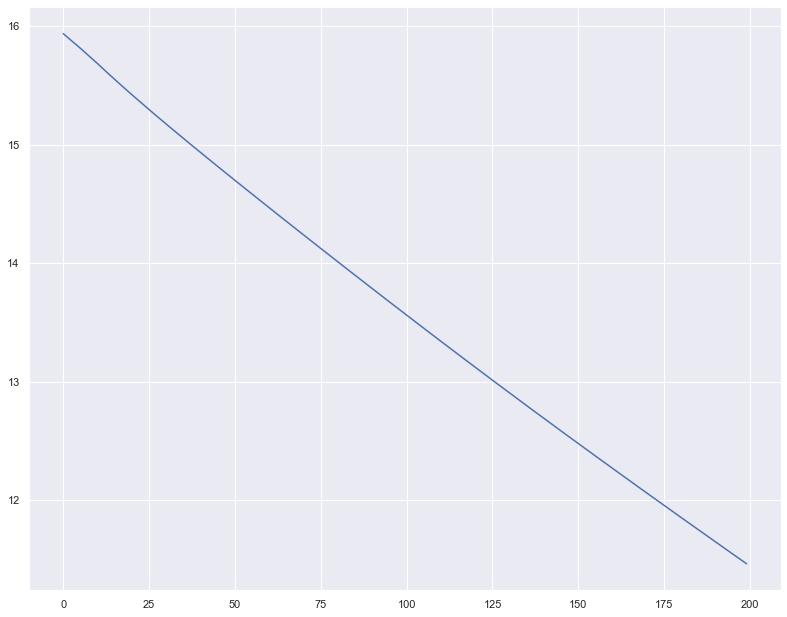

In [71]:
plt.plot(loss)

In [ ]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [106]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print ("LinearRegression:", lr.score(X_test, y_test))
print ("LR RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

LinearRegression: 0.9535755602106208
LR RMSE: 0.16995975432780921


In [95]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

/home/artoy/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Species', ylabel='Density'>

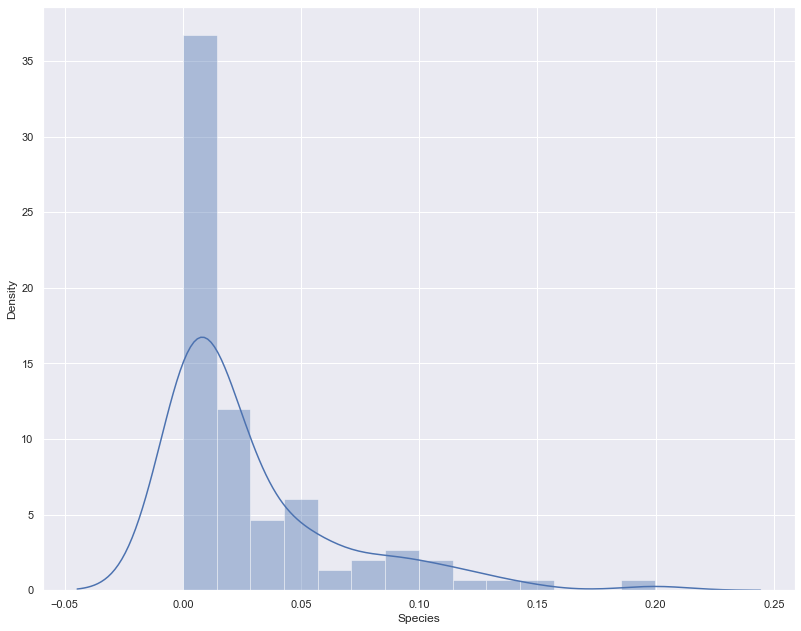

In [107]:
error = (y_train - lr.predict(X_train)) ** 2
sns.distplot(error)

/home/artoy/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Species', ylabel='Density'>

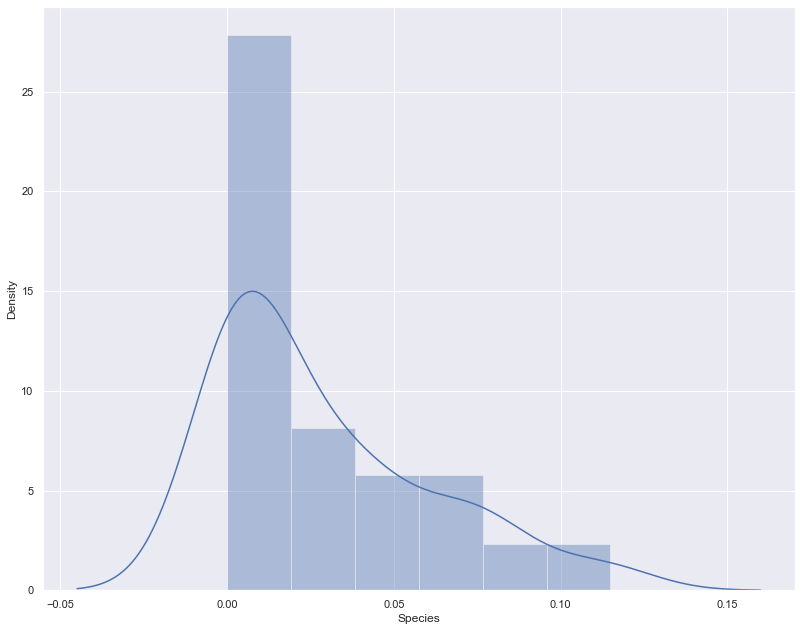

In [108]:
error = (y_test - lr.predict(X_test)) ** 2
sns.distplot(error)